In [1]:
import torch
import numpy as np
from d2l import torch as d2l
from torchvision import transforms
import torchvision
from torch.utils import data
import math
import pandas as pd
from torch.nn import functional as F
import collections
from torch import nn

In [3]:
a=torch.tensor([1,2,3])
a.numpy()

array([1, 2, 3], dtype=int64)

In [4]:
a=torch.tensor([[1,2],[2,3],[3,4]])
len(a)

3

In [10]:
def yield_method():
    for i in range(10):
        yield i
a=yield_method()
print(next(a))
print(next(a))

0
1


In [11]:
for i in yield_method():
    print(i)

0
1
2
3
4
5
6
7
8
9


In [14]:
a=torch.tensor([[1,2],[2,3]])
b=torch.tensor([4,5])
[a,b]
for i in [a,b]:
    print(i)

tensor([[1, 2],
        [2, 3]])
tensor([4, 5])


In [19]:
#torch.utils.data.TensorDataset(*tensor)的使用,tensor的第一个维度必需相同
#通常和DataLoader一起使用
x=torch.tensor([[1,2],[3,4],[4,5],[1,2]])
y=torch.tensor([0,0,1,0])
dataset=torch.utils.data.TensorDataset(x,y)
dataloader=torch.utils.data.DataLoader(dataset,batch_size=2,shuffle=True)
for batch in dataloader:
    data_batch,labels_batch=batch
    print(data_batch)
    print(labels_batch)

tensor([[1, 2],
        [1, 2]])
tensor([0, 0])
tensor([[4, 5],
        [3, 4]])
tensor([1, 0])


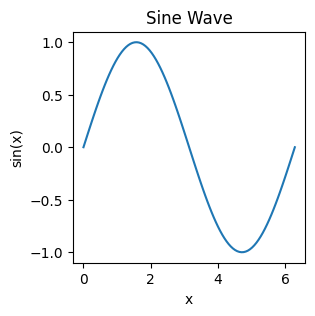

In [6]:
#subplots用法
"""在 d2l 包中，d2l.plt.subplots 是一个用于创建 Matplotlib 图像和子图的函数。这个函数与 Matplotlib 中的 
plt.subplots 类似,主要用于在绘制图像时提供更加方便的界面。
plt.subplots 返回一个包含图形对象 (figure) 和子图对象 (axes) 的元组，可以用来更灵活地控制图形和子图的布局和样式"""
# 使用 d2l.plt.subplots 创建图形和子图
fig, ax = d2l.plt.subplots(figsize=(3,3))

# 创建数据
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# 在子图中绘制数据
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.set_title('Sine Wave')

# 显示图像
d2l.plt.show()

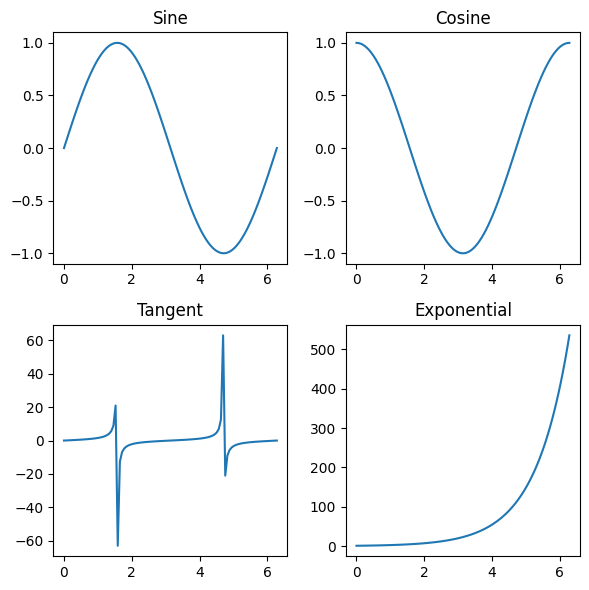

In [10]:
fig, axs = d2l.plt.subplots(nrows=2, ncols=2,figsize=(2*3,2*3))  # 创建一个包含2行2列子图的图形

# 创建数据
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

# 在每个子图中绘制数据
axs[0, 0].plot(x, y1)
axs[0, 0].set_title('Sine')

axs[0, 1].plot(x, y2)
axs[0, 1].set_title('Cosine')

axs[1, 0].plot(x, y3)
axs[1, 0].set_title('Tangent')

axs[1, 1].plot(x, y4)
axs[1, 1].set_title('Exponential')

# 调整布局以防止重叠
fig.tight_layout()

# 显示图像
d2l.plt.show()

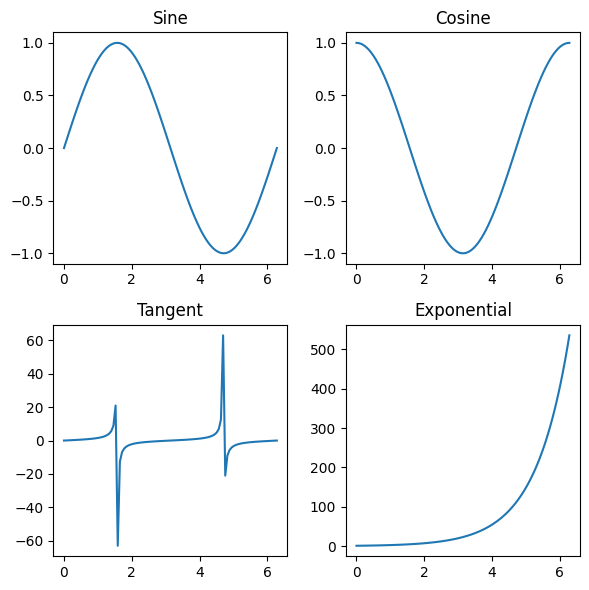

In [13]:
fig, axs = d2l.plt.subplots(nrows=2, ncols=2,figsize=(2*3,2*3))  # 创建一个包含2行2列子图的图形

# 创建数据
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.exp(x)

#将axs展平
axs=axs.flatten()

# 在每个子图中绘制数据
axs[0].plot(x, y1)
axs[0].set_title('Sine')

axs[1].plot(x, y2)
axs[1].set_title('Cosine')

axs[2].plot(x, y3)
axs[2].set_title('Tangent')

axs[3].plot(x, y4)
axs[3].set_title('Exponential')

# 调整布局以防止重叠
fig.tight_layout()

# 显示图像
d2l.plt.show()

In [20]:
trans=transforms.ToTensor()
train_dataset=torchvision.datasets.FashionMNIST(root="C:/Users/Administrator/Desktop/datasets/fashionMnist_download",train=True,transform=trans,download=True)
test_dataset=torchvision.datasets.FashionMNIST(root="C:/Users/Administrator/Desktop/datasets/fashionMnist_download",train=False,transform=trans,download=True)

In [31]:
#iter返回一个迭代器对象
iter(data.DataLoader(train_dataset,batch_size=18))
#用next函数访问,返回一个list
print(next(iter(data.DataLoader(train_dataset,batch_size=18)))[0].shape)
print(next(iter(data.DataLoader(train_dataset,batch_size=18)))[1].shape)

torch.Size([18, 1, 28, 28])
torch.Size([18])


In [5]:
y_hat=torch.tensor([[0.5,0.3,0.2],[0.1,0.3,0.9]])
y_hat=y_hat.argmax(axis=1)
y=torch.tensor([0,2])
print((y==y_hat).sum())

tensor(2)


In [7]:
#numel()函数的用法,返回tensor中总元素个数
y=torch.tensor([0,1,2])
print(y.numel())
x=torch.tensor([[0.1,0.3,0.5],[0.4,0.5,0.6]])
print(x.numel())

3
6


In [11]:
#size()用法
a=torch.tensor([1,2,3])
print(a.size())
print(a.size().numel())
b=torch.tensor([[1,2,3],[3,4,5]])
print(b.size())
print(b.size().numel())

torch.Size([3])
3
torch.Size([2, 3])
6


In [12]:
y=[1,2,3]
y=[y]
print(y)

[[1, 2, 3]]


In [14]:
def re(a=1,b=2):
    return a,b
a=re()
re()+(3,)

(1, 2, 3)

In [2]:
A=[[],[],[]]
A.append(2)
A

[[], [], [], 2]

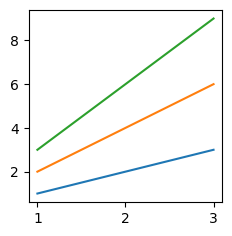

In [8]:
x=[[1,2,3],[1,2,3],[1,2,3]]
y=[[1,2,3],[2,4,6],[3,6,9]]
fig,axes=d2l.plt.subplots(1,1,figsize=(2.5,2.5))
axes=[axes]
for x_i,y_i in zip(x,y):
    axes[0].plot(x_i,y_i)
d2l.plt.show()

In [17]:
a=np.arange(20).reshape(1,-1)
print(a)
b=np.arange(20)
print(b)

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [15]:
a=np.array([[20,10]])
b=np.array([[1,2]])
np.power(a,b)

array([[ 20, 100]])

In [18]:
a=np.array([[1,2,3],[1,2,3]])
a.shape[-1]

3

In [23]:
math.gamma(5) #表示n-1的阶乘

24.0

In [3]:
#assert用于否定错误条件
def divide(a, b):
    assert b != 0, "除数不能为 0"
    return a / b
divide(10,0)

AssertionError: 除数不能为 0

In [4]:
#详细演示一下torch.stack的用法
tensor1=torch.tensor([1,2,3])
tensor2=torch.tensor([4,5,6])
tensor3=torch.tensor([7,8,9])
stacked_tensor=torch.stack([tensor1,tensor2,tensor3],dim=0)
stacked_tensor

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [6]:
#除此之外还可以按照指定维度进行堆叠
stacked_tensor_dim1=torch.stack([tensor1,tensor2,tensor3],dim=1)
stacked_tensor_dim1

tensor([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

In [8]:
#torch.cat和torch.stack的区别
#torch.cat 是用于沿现有维度连接一系列张量的函数。被连接的张量必须在除连接维度外的其他所有维度上具有相同的形状。
#举个例子
tensor1=torch.tensor([[1,2,3],[4,5,6]])
tensor2=torch.tensor([[7,8,9],[10,11,12]])
tensor_cat1=torch.cat((tensor1,tensor2),dim=0)
print(tensor_cat1)
tensor_cat2=torch.cat((tensor1,tensor2),dim=1)
print(tensor_cat2)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[ 1,  2,  3,  7,  8,  9],
        [ 4,  5,  6, 10, 11, 12]])


In [10]:
#torch.stack 是用于沿新维度连接一系列张量的函数。被堆叠的张量必须具有完全相同的形状
tensor1=torch.tensor([[1,2],[3,4]])
tensor2=torch.tensor([[5,6],[7,8]])
tensor_stack=torch.stack((tensor1,tensor2),dim=0)
print(tensor_stack)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [19]:
#torch.stack如果不指定维度会怎么样
tensor1=torch.tensor([1,2,3])
tensor2=torch.tensor([4,5,6])
stacked_tensor=torch.stack((tensor1,tensor2))
stacked_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [2]:
#net.Parameters()是一个可迭代的对象
#next和iter的用法
#iter返回一个迭代器对象，它可以将一个可迭代对象（如列表、元组、字典、集合、字符串等）转换成一个迭代器对象。
#next函数用于从迭代器中获取下一个元素。如果迭代器中没有更多元素，next 会引发 StopIteration 异常。可以提供一个默认值，避免引发异常。
my_list=[1,2,3,4]


In [3]:
1/2

0.5

In [6]:
timer = d2l.Timer()
for _ in range(1000000):
    timer.start()
    # 你的代码块
    timer.stop()
print(f'Total time: {timer.sum():.2f} sec')

Total time: 0.32 sec


In [9]:
X=torch.normal(0,1,size=(3,4))
print(X)
print(X.mean(dim=0).shape)

tensor([[ 0.5163,  0.7552, -0.6233, -1.4869],
        [ 0.1648,  0.2311,  0.8532,  0.0375],
        [ 1.4812,  0.1076, -0.6115, -0.3827]])
torch.Size([4])


In [12]:
import torch

# 创建一个多维张量
tensor = torch.randn(3, 4)

# 使用 .data 获取数据
data_tensor = tensor.data

# 检查 .data 的维度
print("Original Tensor Shape:", tensor.shape)
print("Data Tensor Shape:", data_tensor.shape)
print(tensor)
print(data_tensor)

Original Tensor Shape: torch.Size([3, 4])
Data Tensor Shape: torch.Size([3, 4])
tensor([[-0.4942, -1.9502,  1.2020, -0.4639],
        [ 2.0868, -0.5311, -0.2247, -1.0476],
        [ 1.1892, -0.6358,  1.4329, -0.8461]])
tensor([[-0.4942, -1.9502,  1.2020, -0.4639],
        [ 2.0868, -0.5311, -0.2247, -1.0476],
        [ 1.1892, -0.6358,  1.4329, -0.8461]])


In [6]:
#pandas中set_index和iterrows的用法
df=pd.DataFrame({'A':['foo','bar','baz'],'B':[1,2,3],'C':[4,5,6]})
print(df)

     A  B  C
0  foo  1  4
1  bar  2  5
2  baz  3  6


In [7]:
df=df.set_index('A')
print(df)

     B  C
A        
foo  1  4
bar  2  5
baz  3  6


In [8]:
"""iterrows用于遍历数据框中的所有行"""
df=pd.DataFrame({'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]})
print(df)

   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9


In [9]:
for index,row in df.iterrows():
    print(index)
    print(row)

0
A    1
B    4
C    7
Name: 0, dtype: int64
1
A    2
B    5
C    8
Name: 1, dtype: int64
2
A    3
B    6
C    9
Name: 2, dtype: int64


In [10]:
#pytorch中加载图像的函数torchvision.io.read_image(path, mode=torchvision.io.ImageReadMode.UNCHANGED)
image_tensor=torchvision.io.read_image('C:/Users/Administrator/Desktop/cat1.jpg')
print(image_tensor.shape)

torch.Size([3, 1922, 1440])


In [12]:
#tensor操作中的unsqueeze是什么意思
tensor=torch.tensor([1,2,3,4])
print(tensor.shape)
unsqueezed_tensor=tensor.unsqueeze(1)
print(unsqueezed_tensor.shape)

torch.Size([4])
torch.Size([4, 1])


In [13]:
#tensor中的permute操作用法
tensor=torch.randn(3,256,256)
print(tensor.shape)
permuted_tensor=tensor.permute(1,2,0)
print(permuted_tensor.shape)

torch.Size([3, 256, 256])
torch.Size([256, 256, 3])


In [5]:
#在 PyTorch 中使用 torch.meshgrid 函数生成二维网格坐标的语句
#给定 n 个输入张量，每个张量代表一个坐标轴上的点，torch.meshgrid 会返回 n 个网格坐标张量，每个张量的维度与输入的张量数量相同。
center_h=torch.tensor([1,2,3])#代表x轴上三个点
center_w=torch.tensor([4,5,6])#代表y轴上三个点

shift_x,shift_y=torch.meshgrid(center_h,center_w,indexing='xy')
print(shift_y)
print(shift_x)
print(shift_y.reshape(-1))
print(shift_x.reshape(-1))

tensor([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])
tensor([4, 4, 4, 5, 5, 5, 6, 6, 6])
tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])


In [18]:
#repeat函数的用法，用于重复张量的函数
tensor=torch.tensor([[1,2],[3,4]])
repeated_tensor=tensor.repeat(2,3)
repeated_tensor

tensor([[1, 2, 1, 2, 1, 2],
        [3, 4, 3, 4, 3, 4],
        [1, 2, 1, 2, 1, 2],
        [3, 4, 3, 4, 3, 4]])

In [3]:
#repeat_interleave的用法
x=torch.tensor([1,2,3])
result=torch.repeat_interleave(x,3)
print(result)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])


In [7]:
#enumerate的用法
x=torch.tensor([2,2,2,2])
for i,data in enumerate(x):
    print(i)
    print(data)

0
tensor(2)
1
tensor(2)
2
tensor(2)
3
tensor(2)


In [10]:
#clamp函数的用法
#clamp 是 PyTorch 中的一个函数，用于将张量中的所有元素限制在一个指定的范围内。
x=torch.tensor([0.5,2.0,2.5,3.5,4.0,4.5,5.0])
x_clamped=torch.clamp(x,min=2.0,max=4.0)
print(x_clamped)

tensor([2.0000, 2.0000, 2.5000, 3.5000, 4.0000, 4.0000, 4.0000])


In [15]:
tensor=torch.tensor([[[1],[2],[3]],[[2],[1.5],[0]]])
x,idx=torch.max(tensor,dim=1)
print(x)
print(idx)

tensor([[3.],
        [2.]])
tensor([[2],
        [0]])


In [17]:
#argmax怎么用
a=torch.tensor([1,2,3,4,3,2,5,3,2,6,7,5,6,5,6])
idx=torch.argmax(a)
idx

tensor(10)

In [22]:
a = torch.tensor([[1, 3, 2],
                  [4, 6, 5]])
idx = torch.argmax(a,dim=1)
print(idx)  # 输出：tensor([1, 1])，分别表示每行的最大值的位置

tensor([1, 1])


In [20]:
jaccard =torch.tensor( [[0.3, 0.2],
           [0.5, 0.4],
           [0.2, 0.7]])
idx=torch.argmax(jaccard)
idx

tensor(5)

In [25]:
#sqeeze的用法
#torch.squeeze 是 PyTorch 中用于删除指定维度上大小为1的维度的函数。它通常用于去除多余的维度，使张量更紧凑。
#torch.squeeze(input, dim=None)
#input: 需要进行操作的张量。
#dim (可选): 指定要移除的维度。如果该维度的大小不为1，则不会被移除。如果不指定 dim，则会移除所有大小为1的维度。
a=torch.tensor([[[1],[2],[3]]])
b=torch.squeeze(a)
print(b)
print(a.shape)
print(b.shape)

tensor([1, 2, 3])
torch.Size([1, 3, 1])


In [26]:
#指定维度删除
b=torch.squeeze(a,dim=0)
print(b)
print(a.shape)
print(b.shape)

tensor([[1],
        [2],
        [3]])
torch.Size([1, 3, 1])
torch.Size([3, 1])


In [27]:
tensor=torch.tensor([[[1],[2],[3]],[[4],[5],[6]]])
tensor[1,:2,:] #会减少一个维度

tensor([[4],
        [5]])

In [31]:
#torch.nonzero()的用法
#torch.nonzero 是 PyTorch 中用于返回非零元素索引的函数。它可以用于找到张量中所有非零元素的位置。
#torch.nonzero(input, as_tuple=False)
#input: 需要查找非零元素的张量。
#as_tuple (可选): 如果为 True，则返回一组张量，每个张量对应一个维度的索引；如果为 False，返回一个二维张量，每行是一个非零元素的位置。
tensor=torch.tensor([[1,2,0],
                     [0,0,3],
                     [2,0,1]])
a=torch.nonzero(tensor)
print(a)
b=torch.nonzero(tensor,as_tuple=True)
print(b)

tensor([[0, 0],
        [0, 1],
        [1, 2],
        [2, 0],
        [2, 2]])
(tensor([0, 0, 1, 2, 2]), tensor([0, 1, 2, 0, 2]))


In [4]:
#setattr函数的用法
#setattr(object, name, value)
#object: 要设置属性的对象。
#name: 属性名（字符串）。
#value: 要设置的属性值。
#重新赋值
class Person:
    def __init__(self,name):
        self.name=name
person=Person('Alice')
print(person.name)
setattr(person,'age',30)
print(person.age)

Alice
30


In [5]:
#修改现有值
class Person:
    def __init__(self,name,age):
        self.name=name
        self.age=age
person=Person('Bob',25)
print(person.age)
setattr(person,'age',26)
print(person.age)

25
26


In [10]:
#python中**kwargs的用法
class Myclass:
    def __init__(self,num_classes,**kwargs):
        self.num_classes=num_classes
        self.options=kwargs
class1=Myclass(10,learning_rate=0.01,batch_size=32)
print(class1.num_classes)
print(class1.options)

10
{'learning_rate': 0.01, 'batch_size': 32}


In [ ]:
#getattr的用法，动态获取对象属性的一个内置函数
#getattr(object, name[, default])
#object: 要获取属性的对象。
#name: 作为字符串的属性名称。
#default: 可选参数。如果属性不存在，将返回该默认值。如果未提供默认值且属性不存在，将引发 AttributeError 异常。

In [13]:
class MyClass:
    def __init__(self):
        self.name = "Python"
        self.version = 3.9

obj = MyClass()
name_value = getattr(obj, 'name')
print(name_value)  # 输出: Python

Python


In [14]:
try:
    attr_value = getattr(obj, 'non_existent_attr')
except AttributeError as e:
    print(e)  # 输出: 'MyClass' object has no attribute 'non_existent_attr'

'MyClass' object has no attribute 'non_existent_attr'


In [21]:
tensor=torch.tensor([[1,2,3],[3,2,1]])
tensor.shape[0]

2

In [29]:
X=torch.tensor([[1.0,2,3],[4,5,6]]).float()
print(X.shape)
X_data=F.softmax(X,dim=1)
X_data

torch.Size([2, 3])


tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [2]:
#python中内置的sorted函数
#sorted() 是 Python 中的一个内置函数，用于对可迭代对象（如列表、元组、字符串等）进行排序，
#并返回一个新的排序后的列表。该函数不会修改原始对象，而是返回一个新的排序后的对象。
#语法：sorted(iterable, key=None, reverse=False)


In [3]:
numbers = [5, 2, 9, 1, 5, 6]
sorted_numbers = sorted(numbers)
print(sorted_numbers)  # 输出: [1, 2, 5, 5, 6, 9]


[1, 2, 5, 5, 6, 9]


In [4]:
words = ["apple", "banana", "cherry", "date"]
sorted_words = sorted(words)
print(sorted_words)  # 输出: ['apple', 'banana', 'cherry', 'date']


['apple', 'banana', 'cherry', 'date']


In [5]:
words = ["apple", "banana", "cherry", "date"]
sorted_by_length = sorted(words, key=len)
print(sorted_by_length)  # 输出: ['date', 'apple', 'banana', 'cherry']
#按照字符串长短

['date', 'apple', 'banana', 'cherry']


In [6]:
numbers = [5, 2, 9, 1, 5, 6]
sorted_numbers_desc = sorted(numbers, reverse=True)
print(sorted_numbers_desc)  # 输出: [9, 6, 5, 5, 2, 1]
#降序排列

[9, 6, 5, 5, 2, 1]


In [15]:
tensor=[torch.tensor([[3,4],[1,2]]),torch.tensor([[2,1],[3,4]])]
torch.cat(tensor,dim=0)

tensor([[3, 4],
        [1, 2],
        [2, 1],
        [3, 4]])

In [16]:
#python中的join函数怎么用
#用空格连接字符串列表
words = ['Hello', 'world', 'from', 'Python']
result = ' '.join(words)
print(result)  # 输出: "Hello world from Python"

Hello world from Python


In [17]:
#用逗号连接字符串列表：
words = ['apple', 'banana', 'cherry']
result = ', '.join(words)
print(result)  # 输出: "apple, banana, cherry"


apple, banana, cherry


In [18]:
#没有分隔符
letters = ['P', 'y', 't', 'h', 'o', 'n']
result = ''.join(letters)
print(result)  # 输出: "Python"


Python


In [21]:
params=[1,2,3,4,5]
sum(p for p in params)

15

In [22]:
#生成器
gen = (x**2 for x in range(5))
print(gen)  # 输出: <generator object <genexpr> at 0x00000241670A3970>

<generator object <genexpr> at 0x00000241670A3430>


In [23]:
gen = (x**2 for x in range(5))
# 使用 next() 函数
print(next(gen))  # 输出: 0
print(next(gen))  # 输出: 1
# 或者使用 for 循环
for value in gen:
    print(value)

0
1
4
9
16


In [2]:
#set函数怎么用，set是集合
my_set={1,2,3,4}
another_set=set([1,2,3,4])
print(my_set)
print(another_set)

{1, 2, 3, 4}
{1, 2, 3, 4}


In [3]:
my_set.add(5)
print(my_set)

{1, 2, 3, 4, 5}


In [4]:
#删除元素：使用 remove() 或 discard() 方法。
my_set.remove(3)    # 如果元素不存在，会引发 KeyError
my_set.discard(3)   # 如果元素不存在，不会引发错误

In [5]:
set1 = {1, 2, 3}
set2 = {3, 4, 5}

union_set = set1 | set2       # 并集：{1, 2, 3, 4, 5}
intersection_set = set1 & set2 # 交集：{3}
difference_set = set1 - set2   # 差集：{1, 2}


In [6]:
# 创建一个集合
my_set = {1, 2, 3, 4}

# 添加一个元素
my_set.add(5)

# 删除一个元素
my_set.remove(1)

# 判断元素是否在集合中
print(2 in my_set)  # 输出：True

# 打印集合
print(my_set)  # 输出：{2, 3, 4, 5}


True
{2, 3, 4, 5}


In [7]:
set(',!.')

{'!', ',', '.'}

In [2]:
#*args和**kwargs的区别
def example_function(*args):
    for arg in args:
        print(arg)

# 调用函数
example_function(1, 2, 3)

1
2
3


In [3]:
def example_function(**kwargs):
    for key, value in kwargs.items():
        print(f"{key}: {value}")

# 调用函数
example_function(name="Alice", age=25, location="New York")


name: Alice
age: 25
location: New York


In [4]:
torch.tensor([[2]]).item()

2

In [2]:
X=torch.tensor([[1,2,3],[4,5,6]])
X.dim()

2

In [3]:
-1e6

-1000000.0

In [5]:
#torch.bmm的用法
#torch.bmm 是 PyTorch 中用于批量矩阵乘法的函数。它接收两个 3D 张量作为输入，
#每个张量代表一批矩阵，并返回相乘后的矩阵批次。
batch_size,n,m,p=2,3,4,5
input=torch.randn(batch_size,n,m)
mat2=torch.randn(batch_size,m,p)
result=torch.bmm(input,mat2)
print(result.shape)
print(result)

torch.Size([2, 3, 5])
tensor([[[-1.2997, -0.4530,  2.5332,  1.9322,  0.2736],
         [-0.2795, -4.2042, -2.5678,  1.5737, -1.4742],
         [ 0.1781, -1.1998, -2.9610,  2.2131, -5.0203]],

        [[ 5.7338,  2.1409, -5.3065, -1.2413, -1.4661],
         [ 2.0695,  0.5727, -0.1956, -0.7536, -0.8459],
         [ 0.0084,  1.1084, -0.6842, -0.0775, -0.7544]]])


In [6]:
#transpose函数怎么用
#在 PyTorch 中，transpose 函数用于交换张量的两个维度（即转置张量的某两个轴）。
#它通常用于调整张量的形状，以便于进行特定的计算操作。
import torch

# 创建一个形状为 (2, 3, 4) 的张量
tensor = torch.randn(2, 3, 4)

# 交换第 0 和第 2 维度
transposed_tensor = torch.transpose(tensor, 0, 2)


print(tensor.shape)# 输出: torch.Size([2, 3, 4])
print(tensor)
print(transposed_tensor.shape)  # 输出: torch.Size([4, 3, 2])
print(transposed_tensor)


torch.Size([2, 3, 4])
tensor([[[-0.9908,  1.6242,  0.4035,  0.6455],
         [ 0.0799, -0.4612, -0.1966, -0.9798],
         [-1.5235,  0.5511, -1.0146, -0.2725]],

        [[ 0.6866, -0.1791, -1.9109, -1.1185],
         [-0.0228,  1.2092, -0.0617, -0.8876],
         [ 1.5348,  0.3917, -0.1630, -3.1107]]])
torch.Size([4, 3, 2])
tensor([[[-0.9908,  0.6866],
         [ 0.0799, -0.0228],
         [-1.5235,  1.5348]],

        [[ 1.6242, -0.1791],
         [-0.4612,  1.2092],
         [ 0.5511,  0.3917]],

        [[ 0.4035, -1.9109],
         [-0.1966, -0.0617],
         [-1.0146, -0.1630]],

        [[ 0.6455, -1.1185],
         [-0.9798, -0.8876],
         [-0.2725, -3.1107]]])


In [6]:
#@property 是 Python 中的一种装饰器，用于将类中的方法转化为只读属性。
#通过使用 @property，可以让类的一个方法像访问属性一样被调用，而不需要使用括号 ()。
class Circle:
    def __init__(self,radius):
        self._radius=radius
    @property
    def radius(self):
        return self._radius
c=Circle(5)
print(c.radius)

5


In [4]:
class Circle:
    def __init__(self, radius):
        self._radius = radius

    @property
    def radius(self):
        return self._radius

    @property
    def area(self):
        return 3.14159 * (self._radius ** 2)

# 使用类
c = Circle(5)
print(c.radius)  # 输出: 5
print(c.area)    # 输出: 78.53975


5
78.53975


In [4]:
ln=nn.LayerNorm((1,2))
X=torch.tensor([[[1,2]],[[3,4]],[[5,6]]],dtype=torch.float32)
ln(X)

tensor([[[-1.0000,  1.0000]],

        [[-1.0000,  1.0000]],

        [[-1.0000,  1.0000]]], grad_fn=<NativeLayerNormBackward0>)

In [11]:
import torch
import torch.nn as nn

# 输入张量大小为 (batch_size, sequence_length, num_features)
input_tensor = torch.randn(32, 10, 64)

# 创建 LayerNorm 实例，normalized_shape 设置为 (sequence_length, num_features)
layer_norm = nn.LayerNorm([10, 64])

# 应用层归一化
output_tensor = layer_norm(input_tensor)

print(output_tensor.shape)


torch.Size([32, 10, 64])


In [8]:
X=torch.tensor([[[1,2],[0,0]],[[1,2],[1,2]],[[5,6],[5,6]]],dtype=torch.float32)
ln=nn.LayerNorm(2)
ln(X)

tensor([[[-1.0000,  1.0000],
         [ 0.0000,  0.0000]],

        [[-1.0000,  1.0000],
         [-1.0000,  1.0000]],

        [[-1.0000,  1.0000],
         [-1.0000,  1.0000]]], grad_fn=<NativeLayerNormBackward0>)

In [1]:
#round函数
#保留到整数
result = round(3.14159)
print(result)  # 输出：3
#保留指定位数
result = round(3.14159, 2)
print(result)  # 输出：3.14
#保留整数
result = round(12345, -2)
print(result)  # 输出：12300


3
3.14
12300
